In [1]:
%pylab inline
import sys
sys.path.append("../")

import mappy, geopandas

from mappy.plotting import plot_contacts_and_units_points

Populating the interactive namespace from numpy and matplotlib


In [2]:
lines = geopandas.read_file("../input_data/contacts")
lines = mappy.geom_ops.remove_null_geometries(lines)

points = geopandas.read_file("../input_data/unit_id")

attribute = "unit_name" # identifier for the units in the units point file

/home/luca/.local/lib/python3.8/site-packages/geopandas/plotting.py:203: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


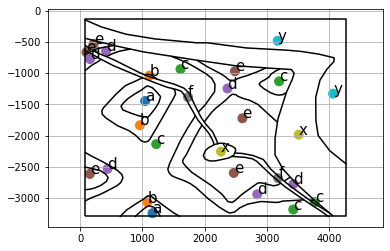

In [3]:
plot_contacts_and_units_points(lines, points, attribute)

In [6]:
out = mappy.geom_ops.mappy_construct(lines, points, "constructed.gpkg", attribute)

output geopackage constructed.gpkg already contains a layer named geomap.


/home/luca/.local/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/luca/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

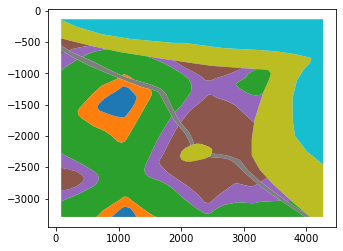

In [7]:
polygons = geopandas.read_file("constructed.gpkg")
polygons.plot(column="unit_name")

In [8]:
## now we test the deconstruction
out = mappy.geom_ops.mappy_deconstruct(polygons, "unit_name", "deconstucted.gpkg", "lines", "indicator_points")

/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/.local/lib/python3.8/site-packages/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]
../mappy/geom_ops.py:360: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  glines = [asLineString(e) for e in out]


In [9]:
dec_lines = geopandas.read_file("deconstucted.gpkg", layer="lines")
dec_points = geopandas.read_file("deconstucted.gpkg", layer="indicator_points")

In [ ]:
plot_contacts_and_units_points(dec_lines, points, attribute)